In [306]:
#Read the dataset
with open(r"dataset.txt",'r') as f:
    names = f.read().splitlines()

In [ ]:
#Map characters to integers & integer to characters
start_no, n = 97, 26
stoi = {chr(i):i-start_no+1 for i in range(start_no, start_no+n)}
stoi["."] = 0
stoi = dict(sorted(stoi.items(), key = lambda item: item[1]))

itos = {i:c for c,i in stoi.items()}


In [308]:
#Create a zero matrix of dim 27x27
import torch
m = n+1
co_occurance_matrix = torch.zeros(m,m, dtype=torch.int32)

In [309]:
#Create a matrix to store the co_occurence counts
for name in names:
    chrs = ["."] + list(name) + ["."]
    for c0,c1 in zip(chrs, chrs[1:]):
        co_occurance_matrix[stoi[c0], stoi[c1]] += 1

Text(0.5, 1.0, 'Co-occurance matrix')

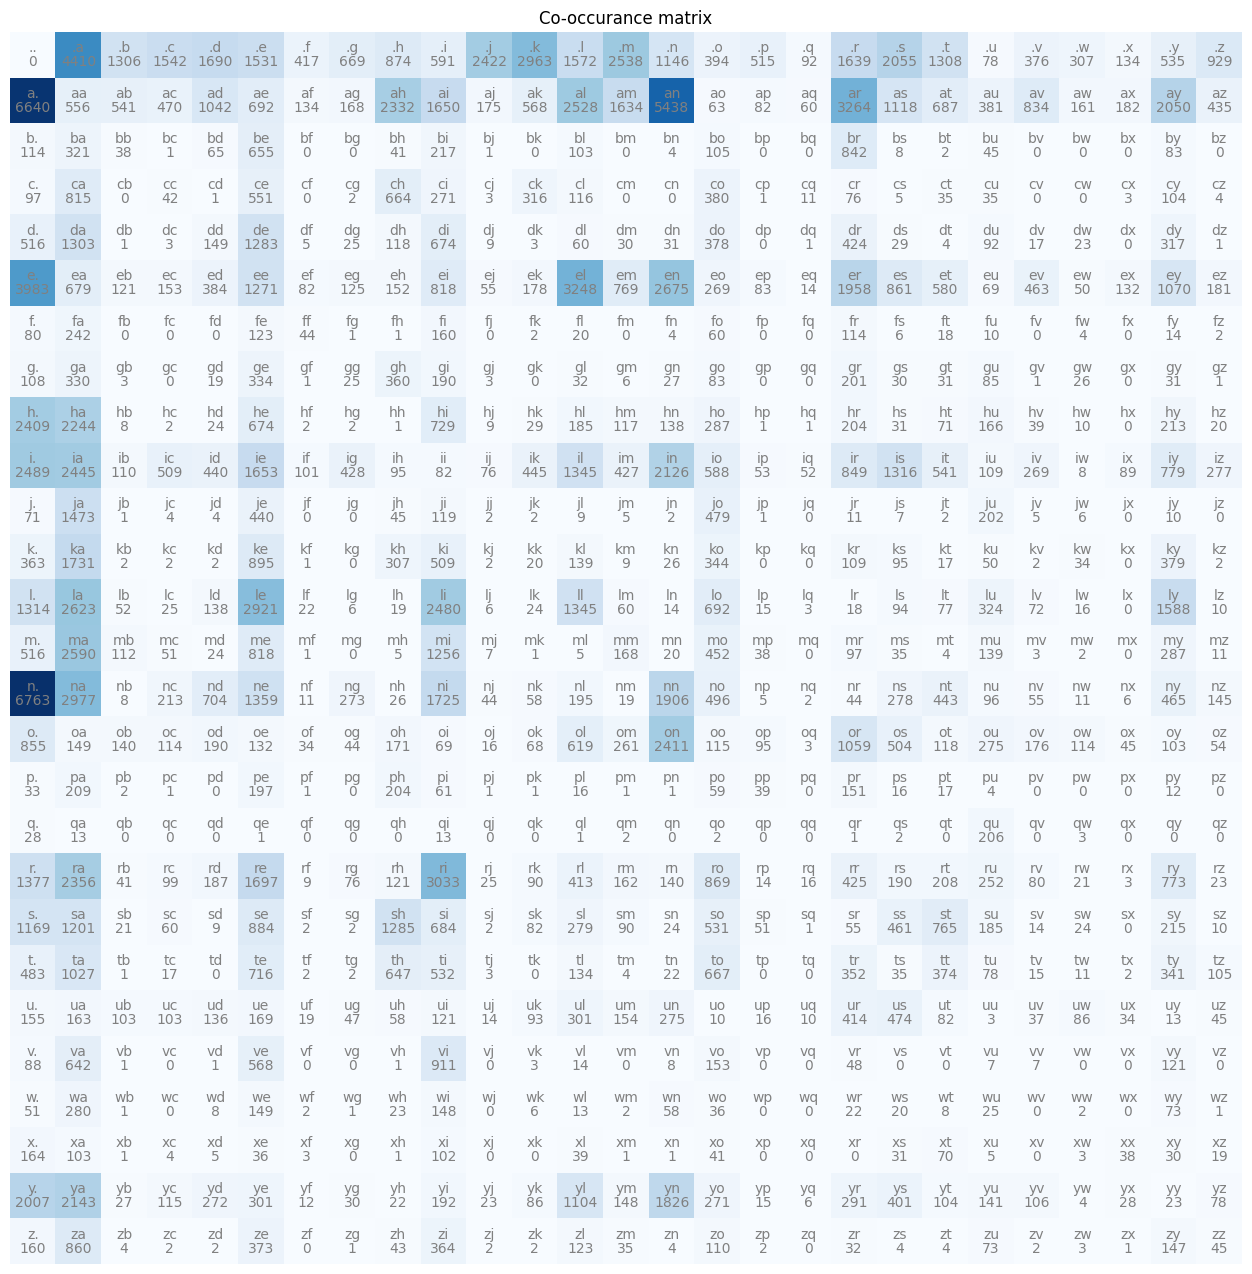

In [310]:
#Plot the co_occurance matrix
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize = (16,16))
plt.imshow(co_occurance_matrix,cmap = 'Blues')

for i in range(m):
    for j in range(m):
        plt.text(j,i, co_occurance_matrix[i,j].item(), ha='center', va='top', color='gray')
        plt.text(j,i, itos[i]+itos[j], ha='center', va='bottom', color='gray')
plt.axis('off')
plt.title("Co-occurance matrix")


In [311]:
#Normalize the co-occurance matrix as a whole
p_matrix = (co_occurance_matrix+1).float() #Regularizing the count matrix so that we don't get inf loss
p_matrix = p_matrix / p_matrix.sum(1, keepdim=True)

In [312]:
#Create a word by sampling characters from the co-occurance matrix
word = ""
start_index = 0
c = ""
while c!='.':
    word+=c
    p = p_matrix[start_index, :]
    sample_index = torch.multinomial(input=p,num_samples=1).item()
    start_index = sample_index
    c = itos[sample_index]

In [314]:
#Observe loss w.r.t training dataset
log_likelihood =0
n =0

for name in names[:5]:
    chrs = ["."] + list(name) + ["."]
    for c0,c1 in zip(chrs,chrs[1:]):
        i,j = stoi[c0], stoi[c1]
        # print(f"prob of {c0,c1}={p_matrix[i,j]}")
        log_likelihood+=p_matrix[i,j].log().item()
        n+=1
nll_loss = -log_likelihood/n
print(nll_loss)

2.432032773271203
